<a href="https://colab.research.google.com/github/ahrami/Packages/blob/main/Anime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1
2
First 10 rows:
                              Title      Production  Episodes       Source  \
0                Shingeki no Kyojin      Wit Studio      25.0        Manga   
1  Fullmetal Alchemist: Brotherhood           Bones      64.0        Manga   
2                  Sword Art Online    A-1 Pictures      25.0  Light novel   
3                     One Punch Man        Madhouse      12.0    Web manga   
4             Boku no Hero Academia           Bones      13.0        Manga   
5                       Tokyo Ghoul  Studio Pierrot      12.0        Manga   
6                            Naruto  Studio Pierrot     220.0        Manga   
7            Hunter x Hunter (2011)        Madhouse     148.0        Manga   
8                  Kimetsu no Yaiba        ufotable      26.0        Manga   
9       Shingeki no Kyojin Season 2      Wit Studio      12.0        Manga   

                                      Genre Airdate  Rating   Voters  \
0              Action,Drama,Fantasy,Mystery     Na

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


5
episodes:
count    1939.000000
mean       14.975245
std        28.116711
min         1.000000
25%         1.000000
50%        12.000000
75%        13.000000
max       500.000000
Name: episodes, dtype: float64
rating:
count    1944.000000
mean        7.150849
std         0.709454
min         2.960000
25%         6.720000
50%         7.210000
75%         7.590000
max         9.160000
Name: rating, dtype: float64
voters:
count    1.992000e+03
mean     1.643311e+05
std      3.135926e+05
min      8.662000e+03
25%      2.126500e+04
50%      5.478550e+04
75%      1.585070e+05
max      3.142121e+06
Name: voters, dtype: float64
6
title:
Shingeki_no_Kyojin                                      1
Mirai_Nikki_(TV)                                        1
One_Punch_Man                                           1
Boku_no_Hero_Academia                                   1
Tokyo_Ghoul                                             1
                                                       ..
Bleach:_Gotei_

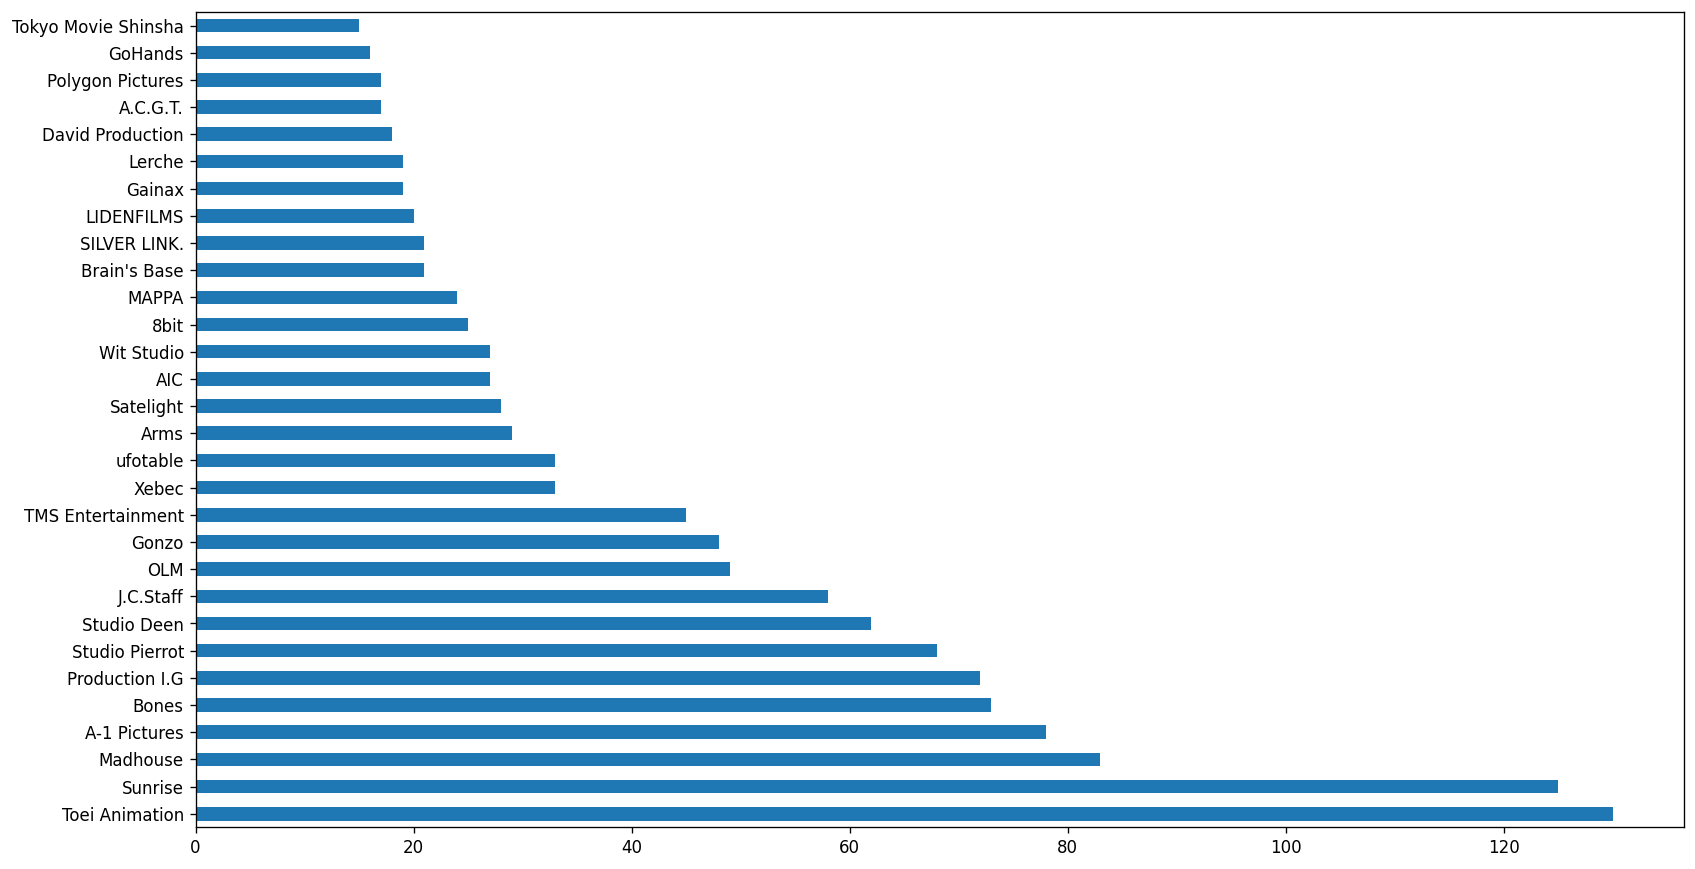

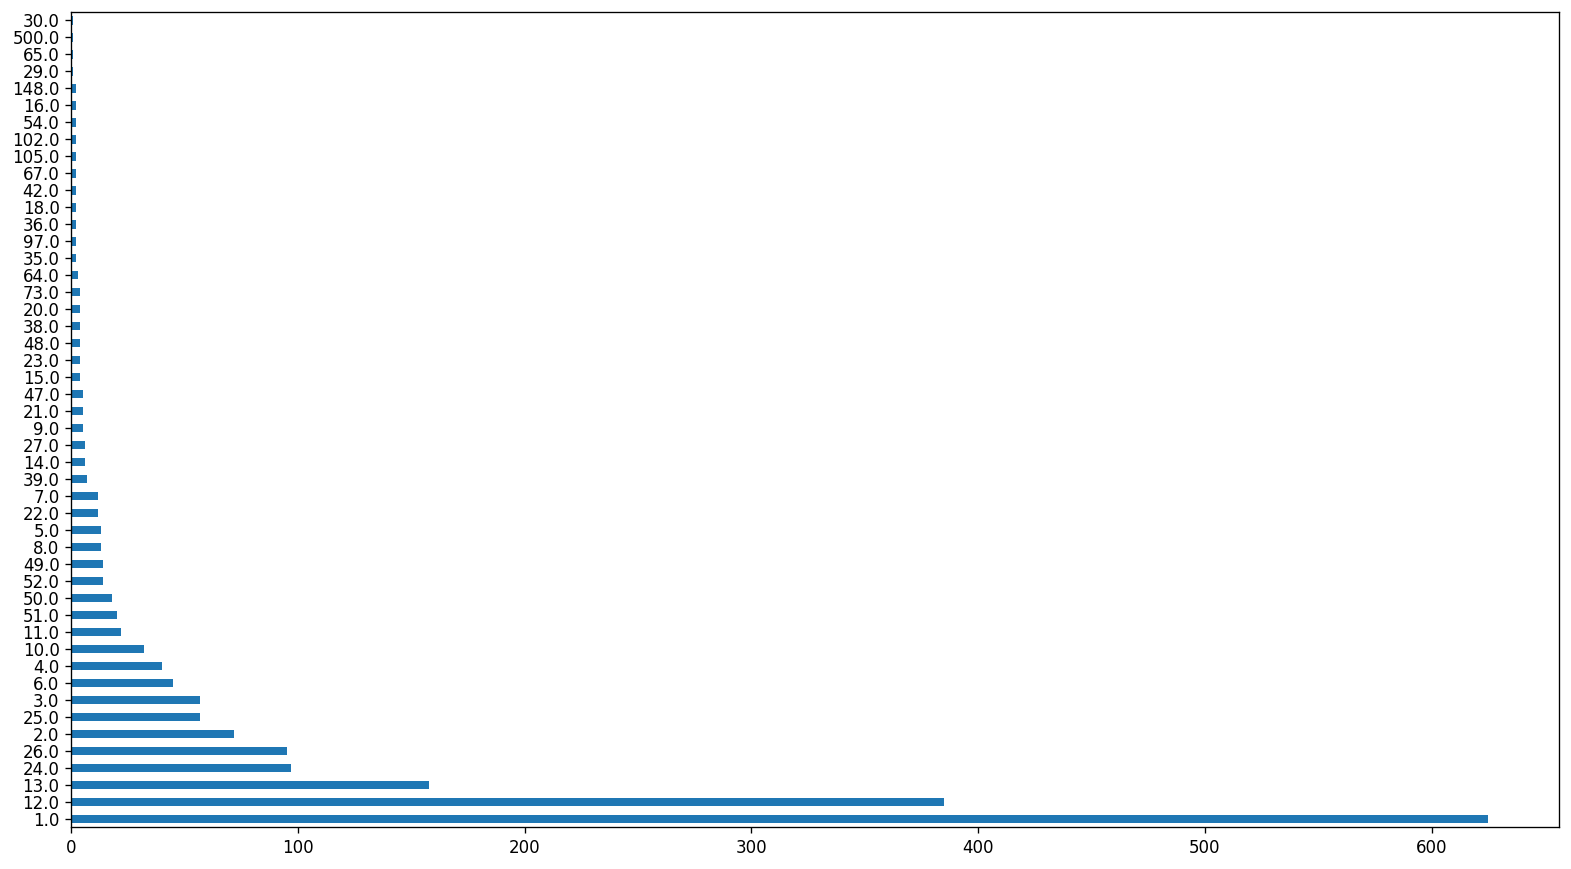

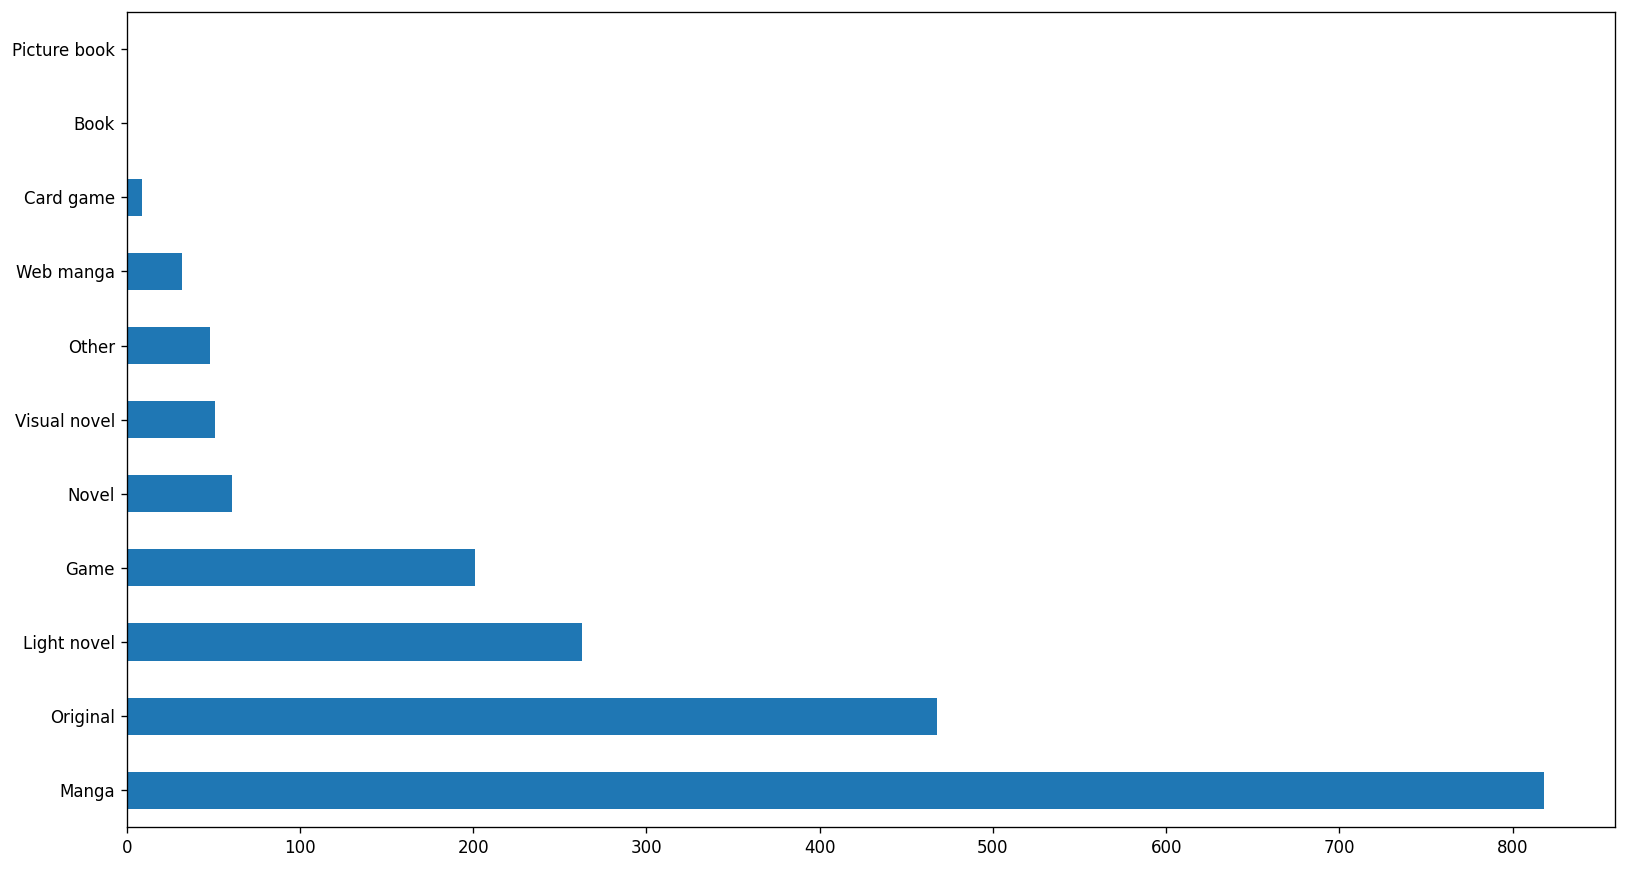

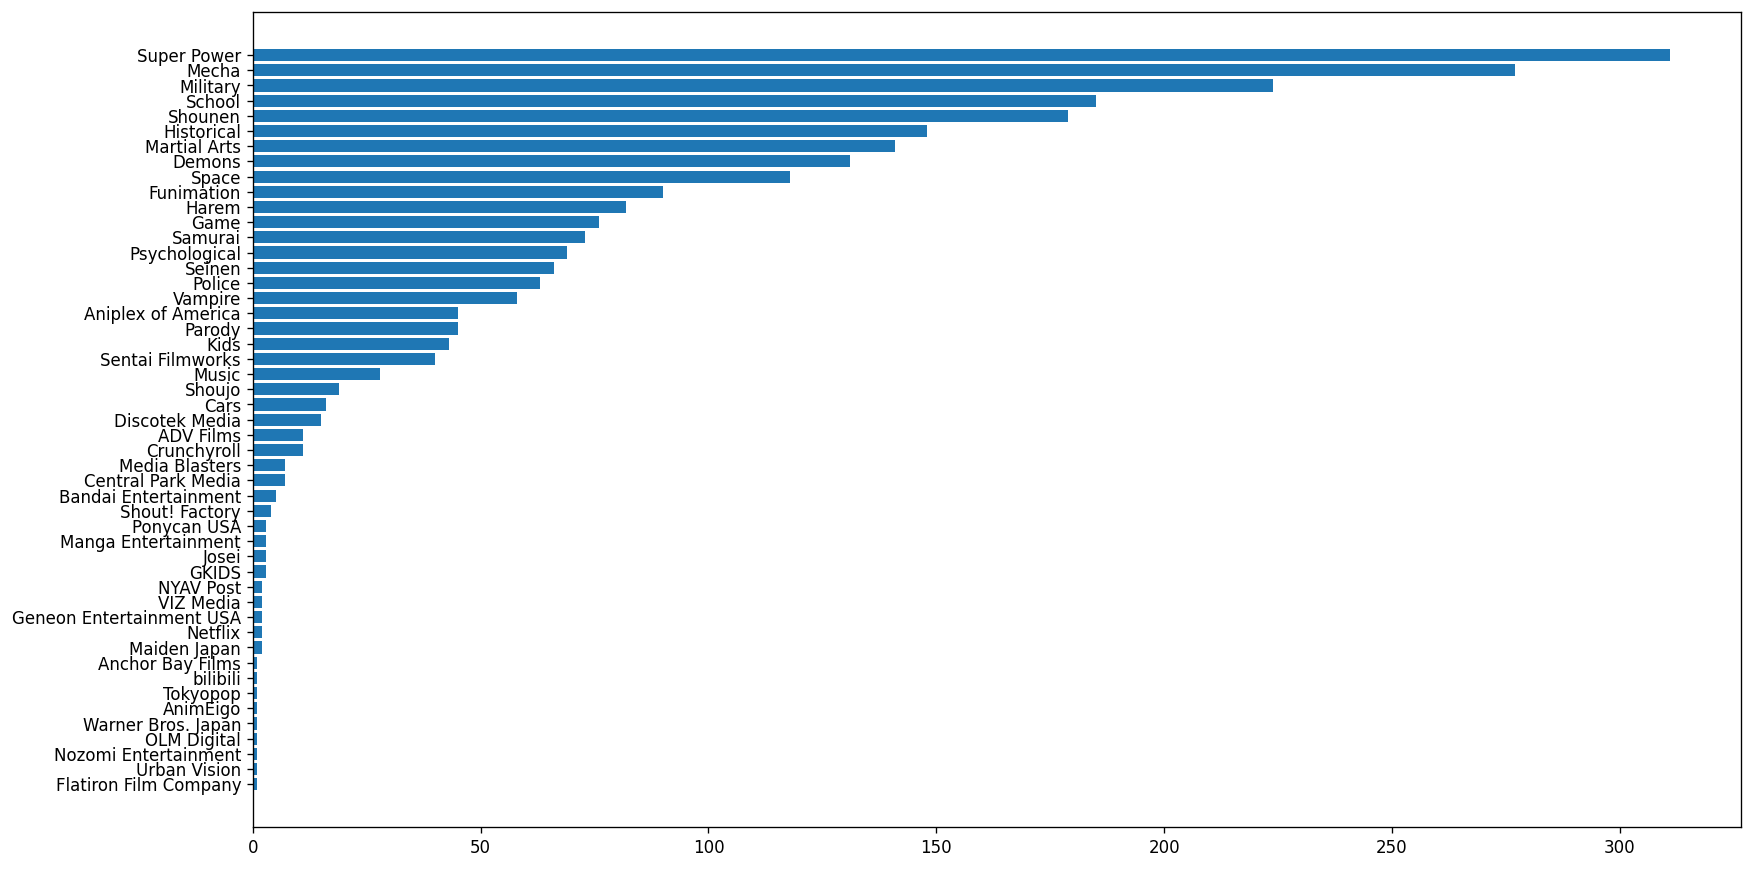

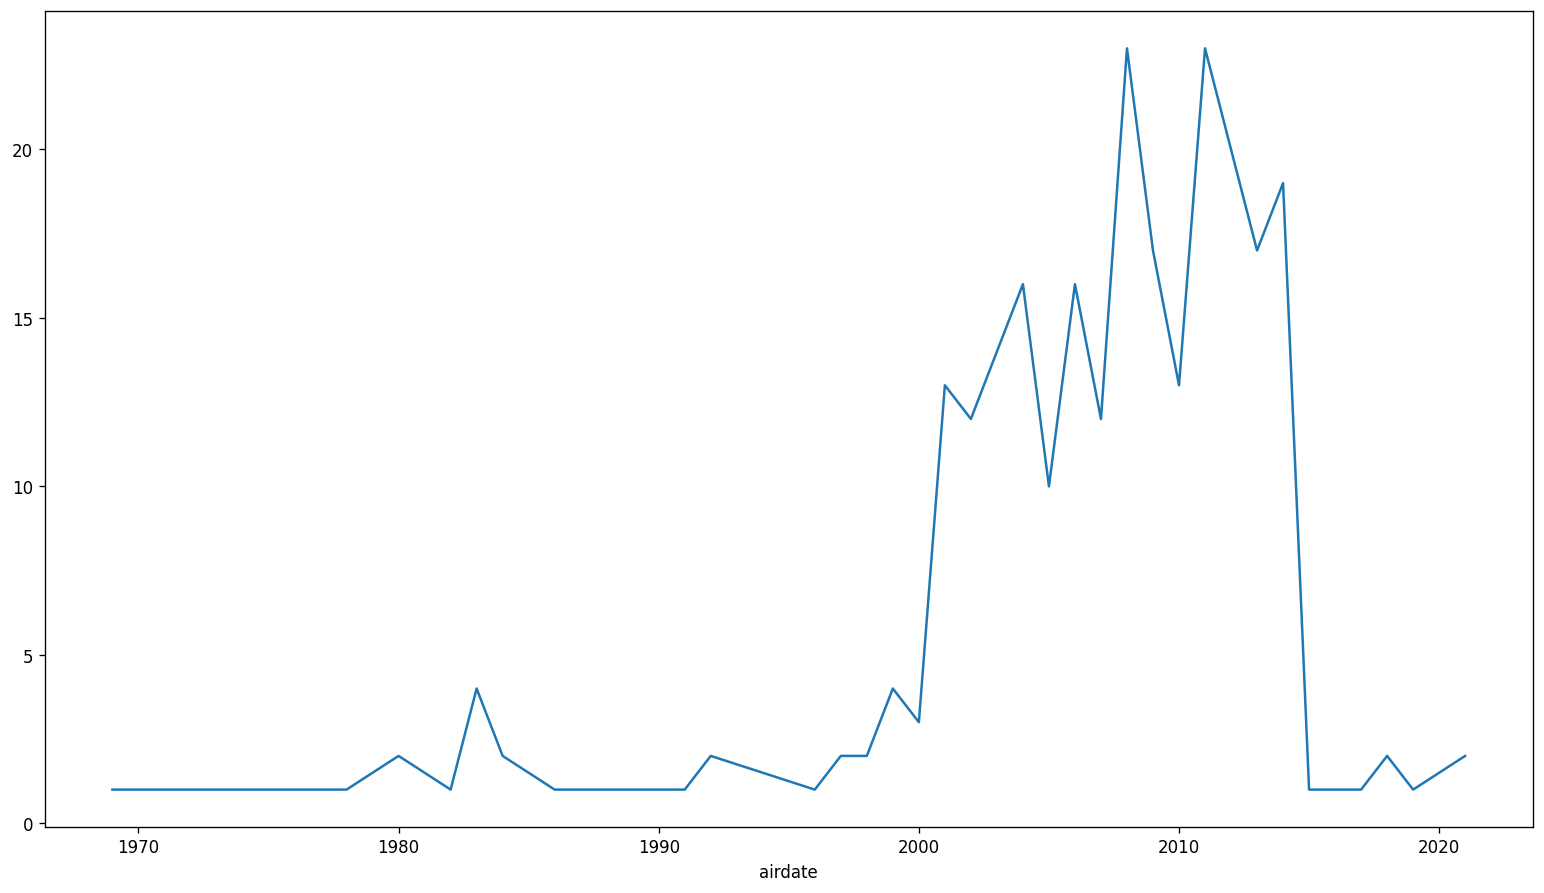

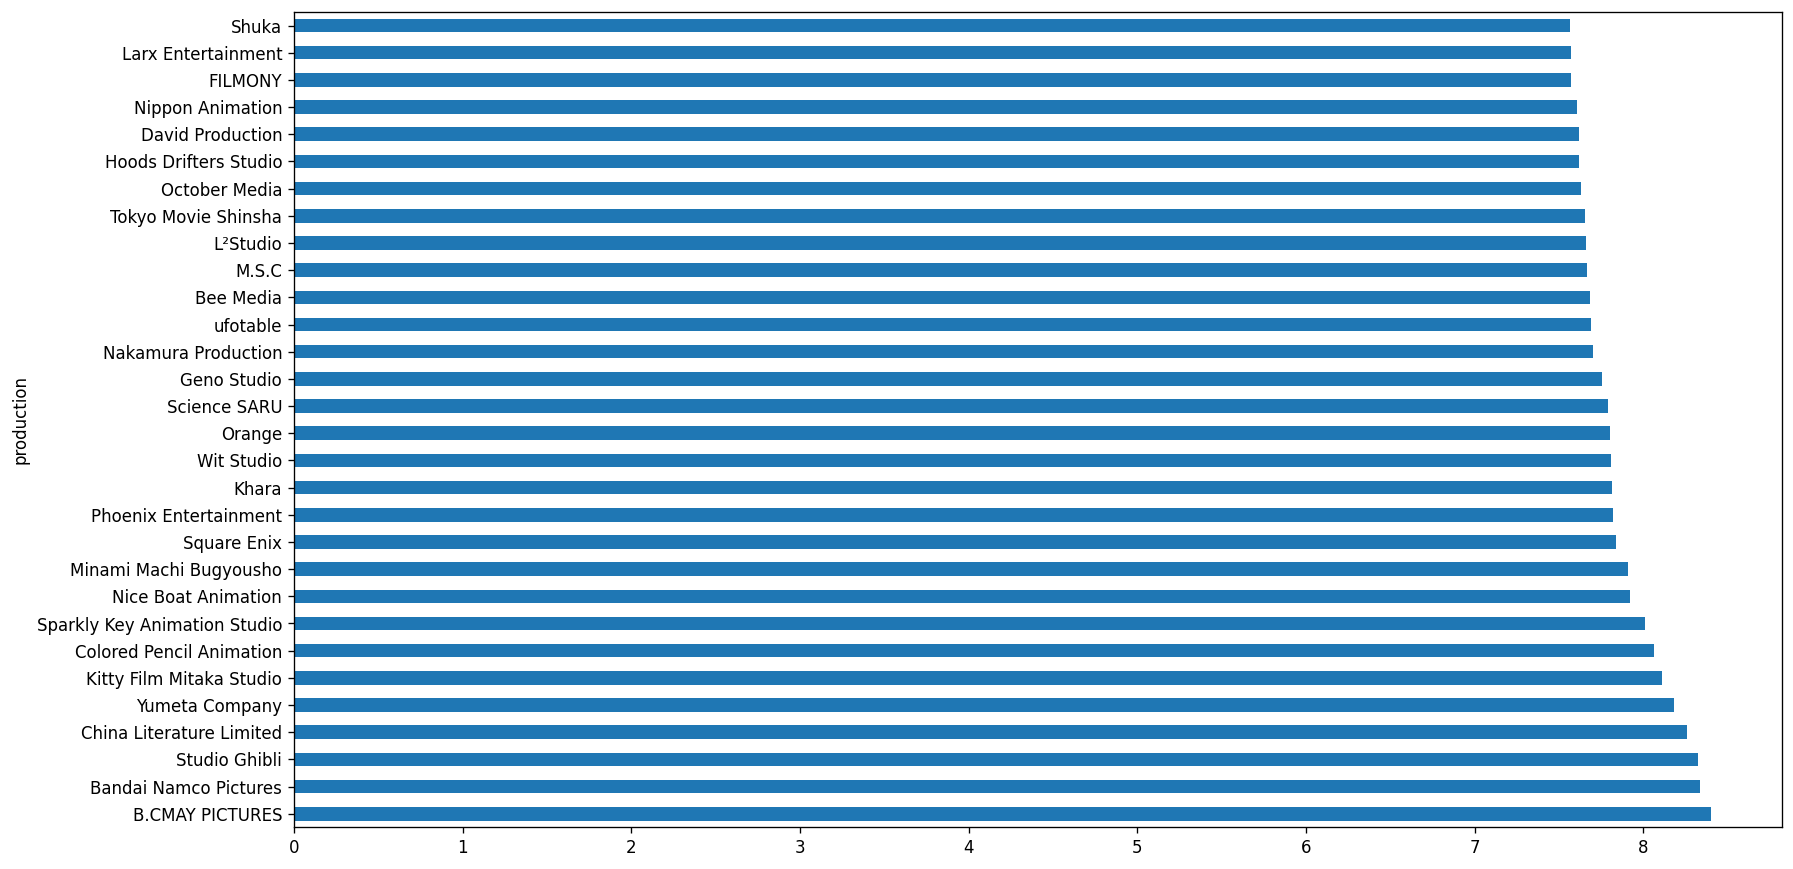

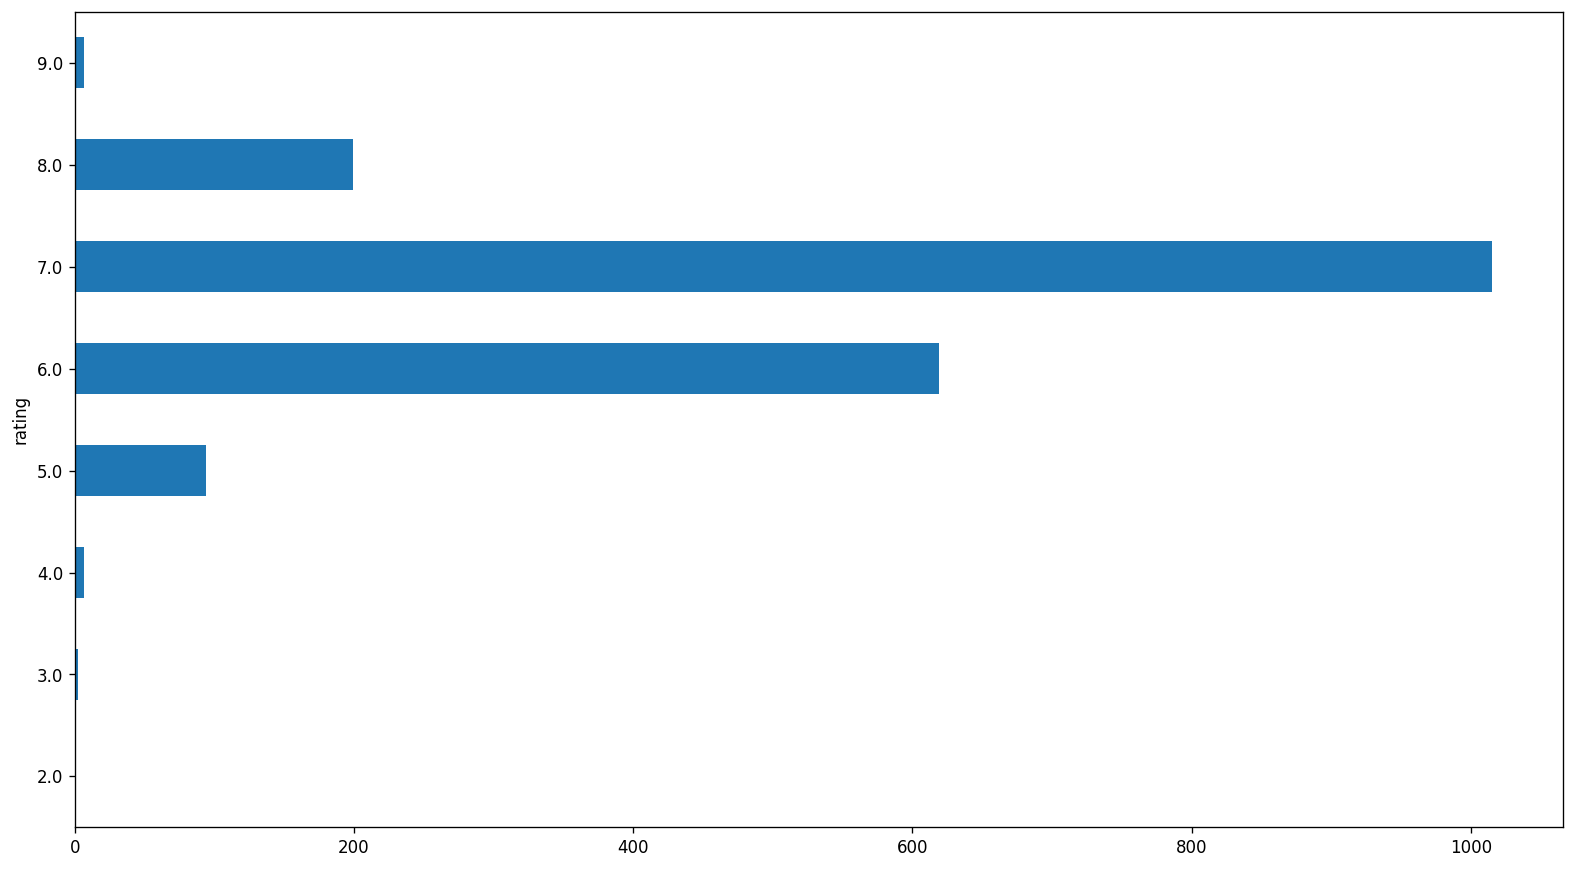

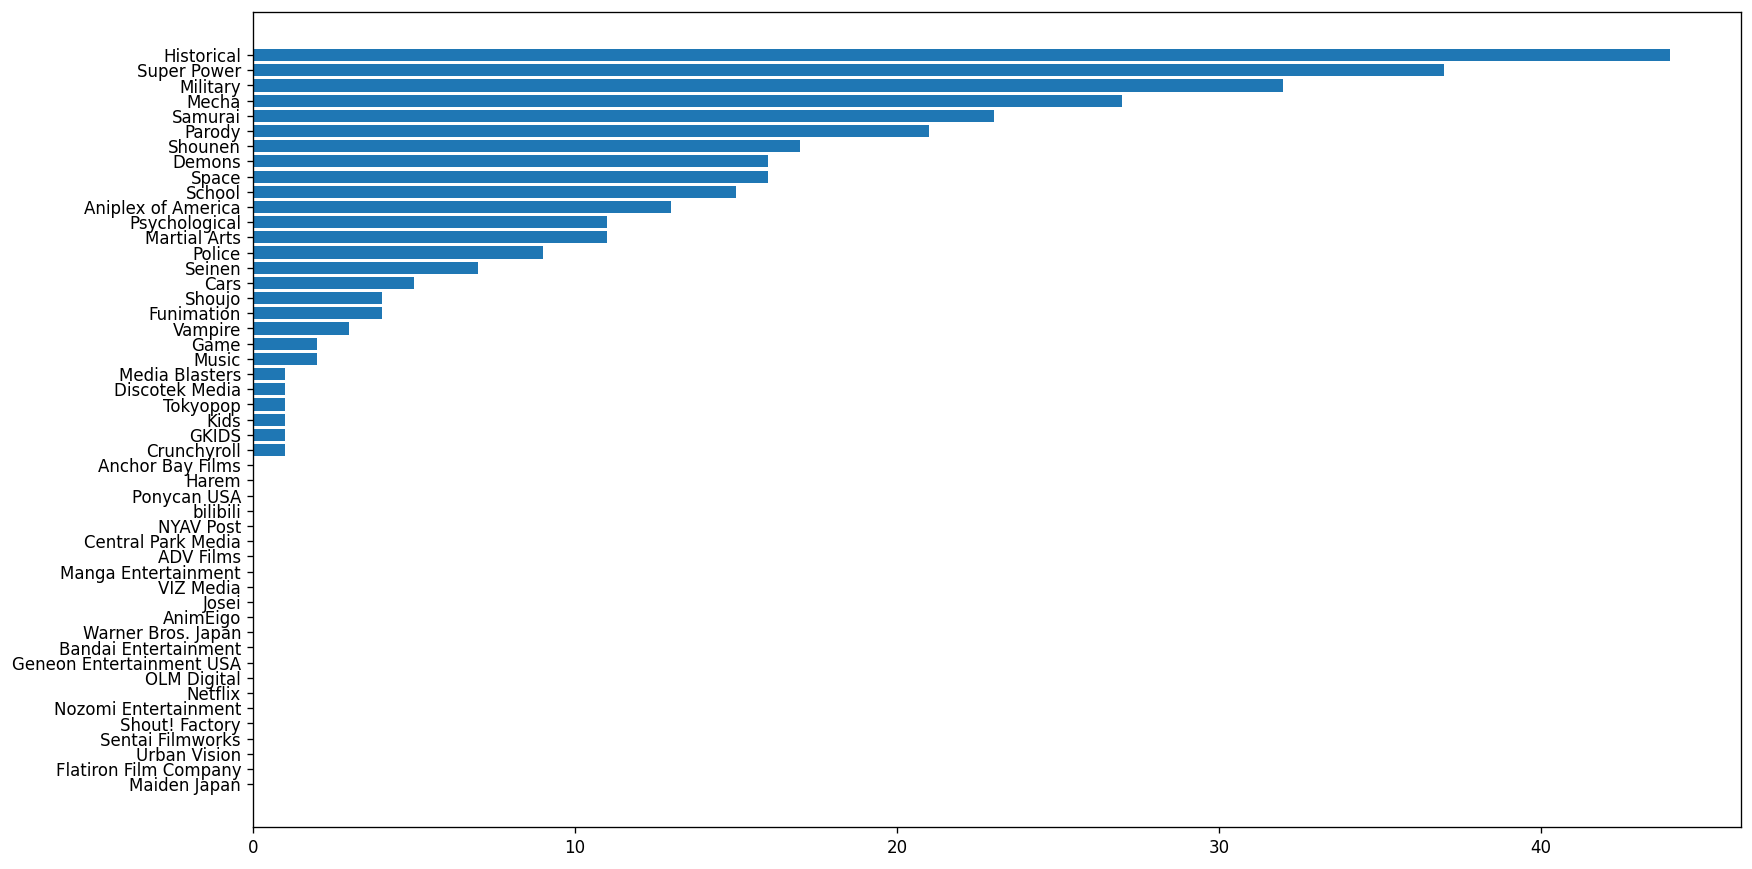

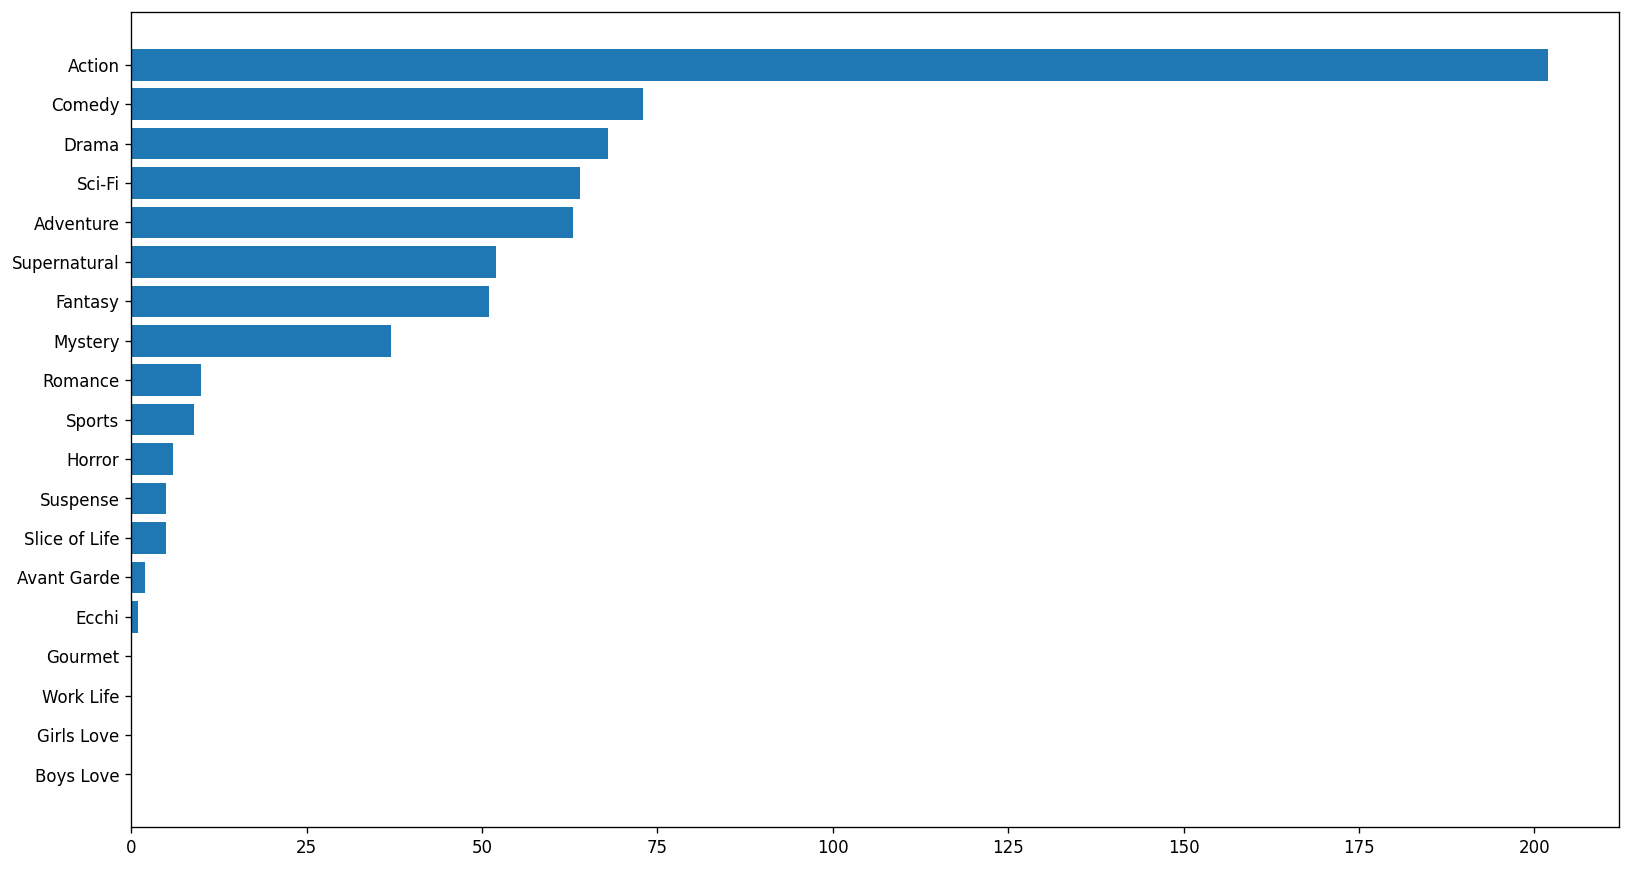

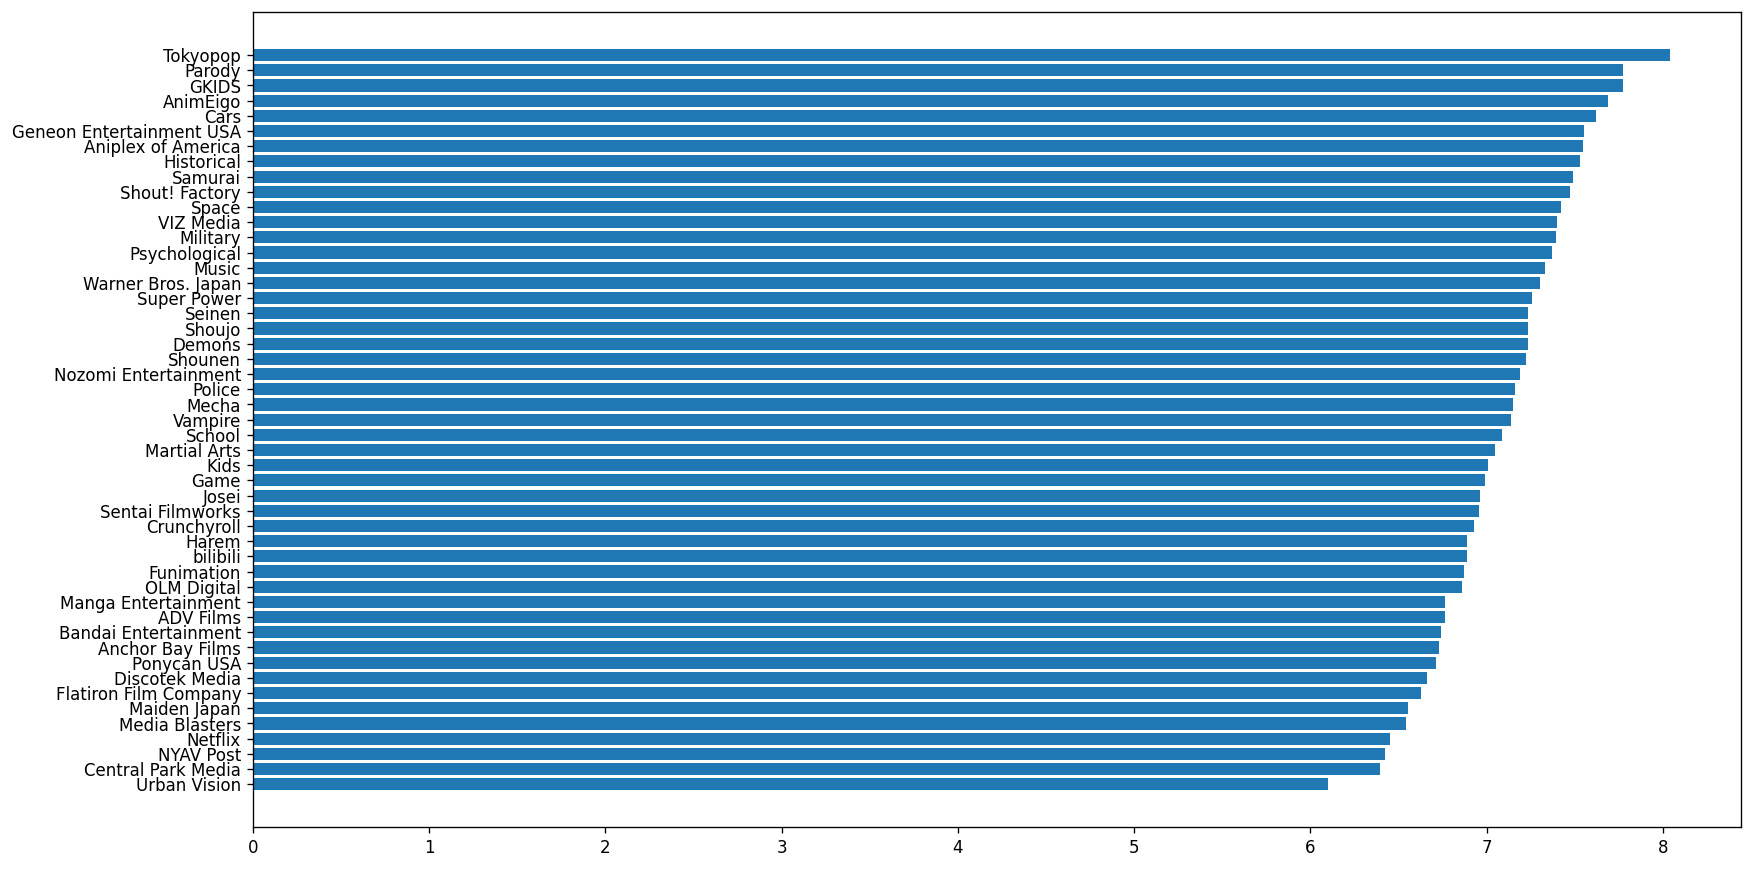

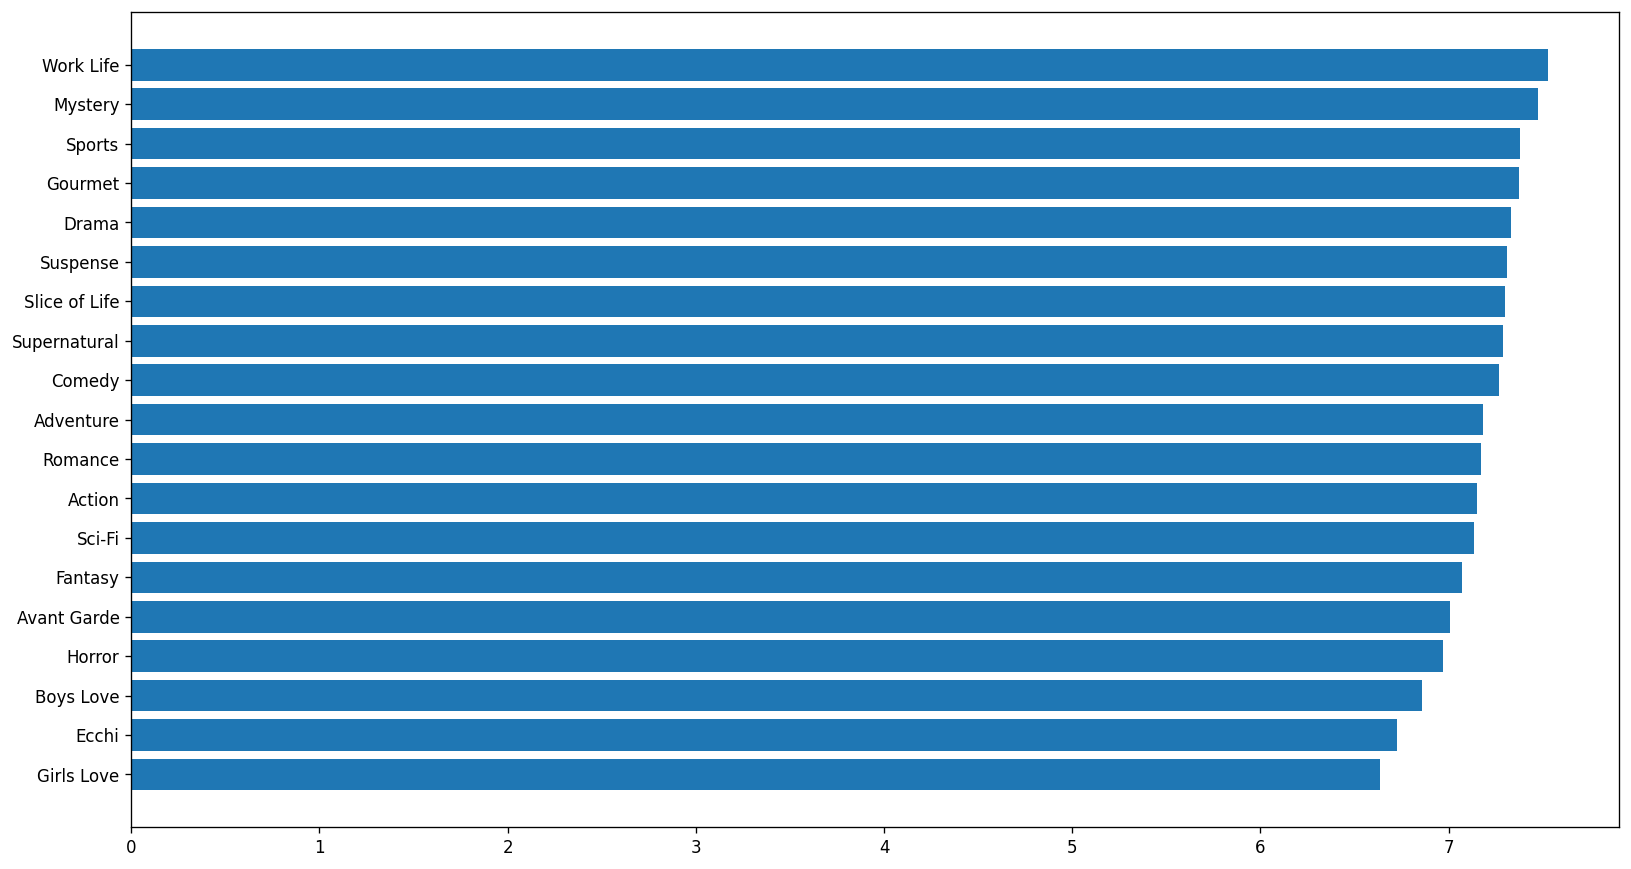

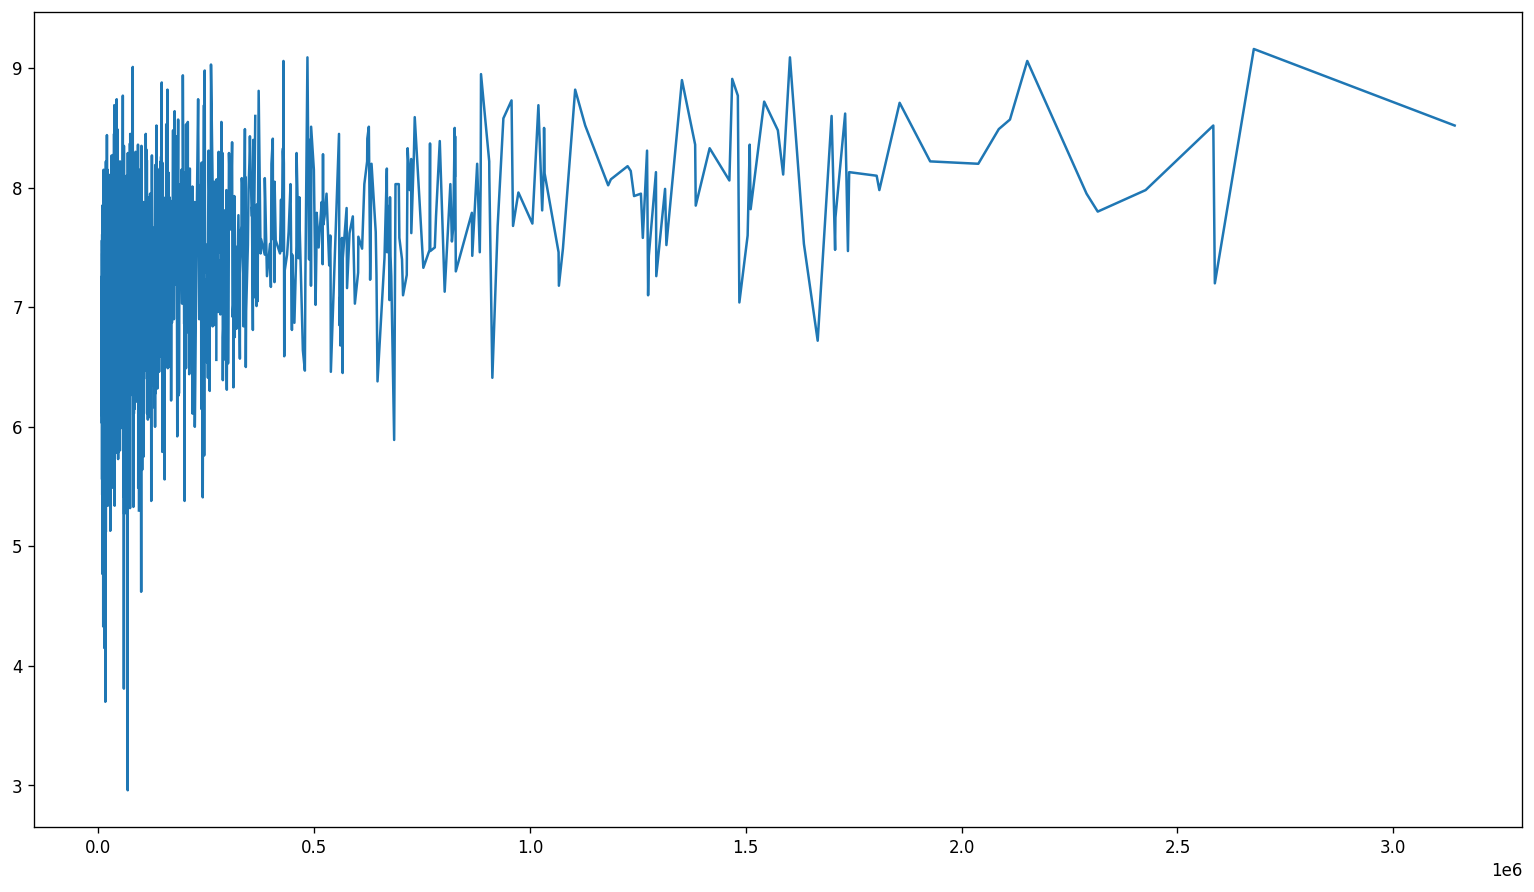

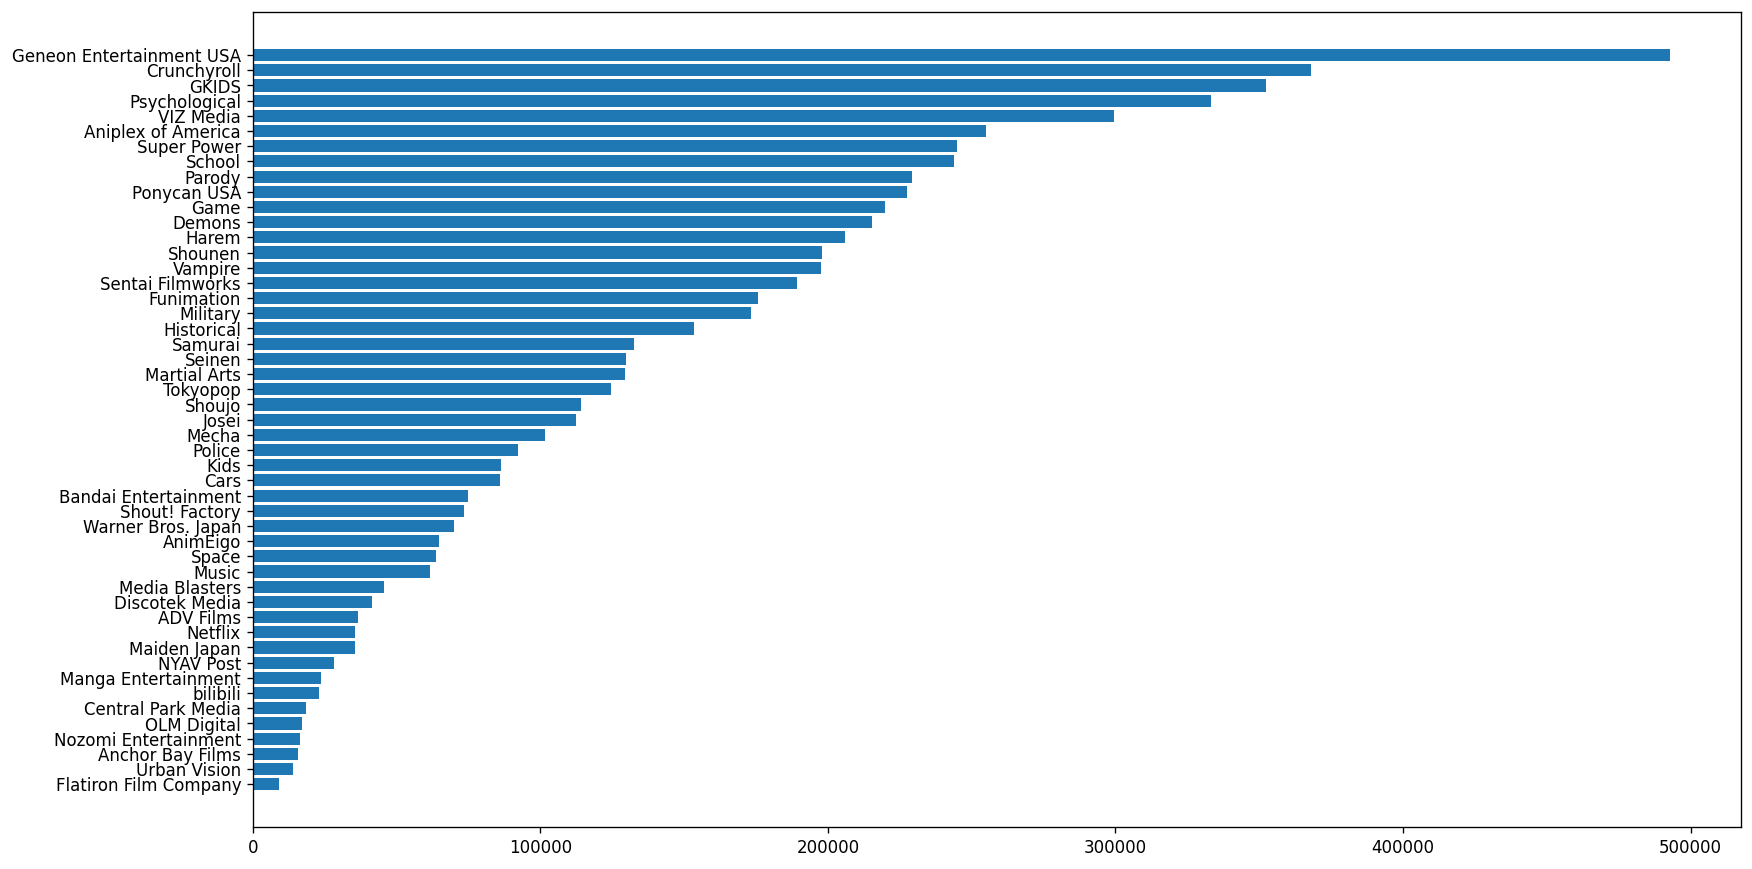

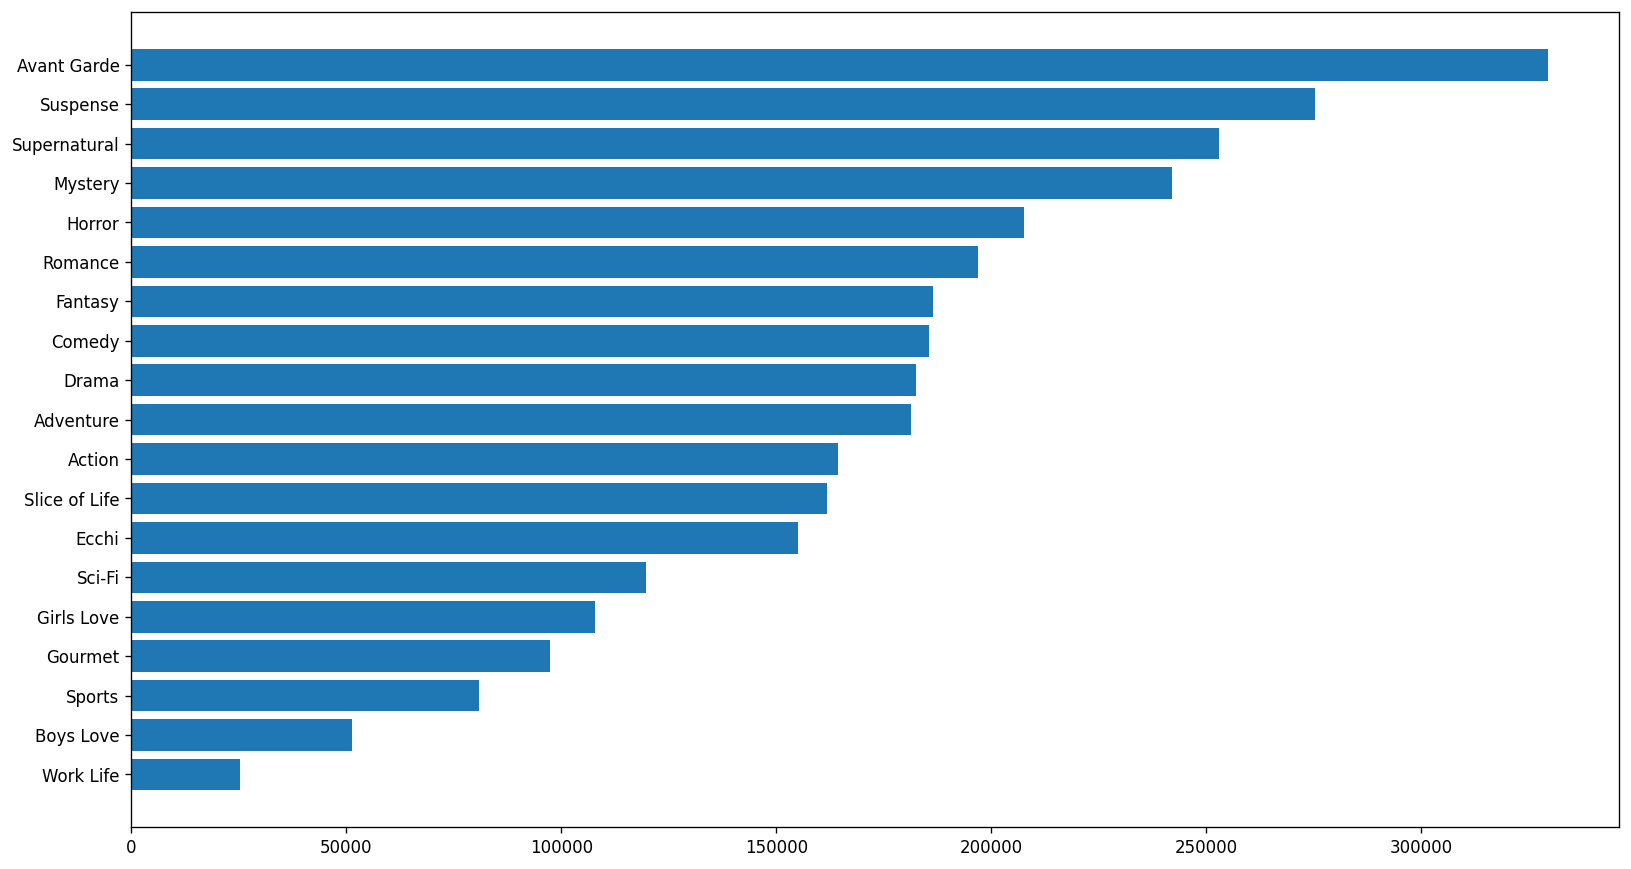

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(1) #1
df = pd.read_csv('anime.csv', thousands=',', na_values=['?', '-'], parse_dates = ['Airdate'])
df['Airdate'] = df['Airdate'].str.replace(' (JST)', '-0900')
df['Airdate'] = pd.to_datetime(df['Airdate'], errors='coerce')

print(2) #2
print("First 10 rows:")
print(df.head(10))

print(3) #3
print("Info:")
for column in df.columns:
    print(column, ': ', df[column].dtypes, sep = '')
    
print(4) #4
df.rename(columns=str.lower, inplace=True)
for column in df.columns:
    print(column)
df['title'] = df['title'].astype('string')
for i in range(0, df['title'].size):
    df['title'][i] = df['title'][i].replace(' ', '_')

print(5) #5
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        print(column, ':', sep = '')
        print(df[column].describe())

print(6) #6
for column in df.columns:
    if not pd.api.types.is_numeric_dtype(df[column]):
        print(column, ':', sep = '')
        print(df[column].value_counts())

print(8) #8
#8a
fig = plt.figure('Production', figsize=(16, 9), dpi=120)
pr = df['production'].value_counts()[:30]
#pr = df['production'].value_counts()
pr.plot.barh()
#8b
fig = plt.figure('Episodes', figsize=(16, 9), dpi=120)
ep = df['episodes'].value_counts()[:30]
#ep = df['episodes'].value_counts()
ep.plot.barh()
#8c
fig = plt.figure('Source', figsize=(16, 9), dpi=120)
sr = df['source'].value_counts()[:30]
#sr = df['source'].value_counts()
sr.plot.barh()
#8d
fig = plt.figure('Theme', figsize=(16, 9), dpi=120)
masked = set(df['theme'])
et = set()
for comb in masked:
    if type(comb) == str:
        for s in comb.split(','):
            et.add(s)
themes = dict()
for theme in et:
    themes[theme] = df['theme'].str.contains(theme, na=False, regex=False).sum()    
t = list()
for key in themes:
    t.append((key, themes[key]))
t = sorted(t, key = lambda x: x[1])
val = list()
label = list()
for tup in t:
    label.append(tup[0])
    val.append(tup[1])
plt.barh(range(len(t)), val, tick_label=label)
#8e
fig = plt.figure('Year', figsize=(16, 9), dpi=120)
yr = df['airdate'].groupby(df['airdate'].dt.year).count()
yr.plot()

print(9) #9
fig = plt.figure('Rating', figsize=(16, 9), dpi=120)
rmean = df['rating'].groupby(df['production']).mean()
rmean = rmean.sort_values(ascending = False)[:30]
#rmean = rmean.sort_values(ascending = False)
rmean.plot.barh()

print(10) #10
fig = plt.figure('Rating Intervals', figsize=(16, 9), dpi=120)
rt = df['rating'].groupby(by=(df['rating'].apply(np.floor)), dropna=True).count()
rt.plot.barh()

print(11) #11

fig = plt.figure('Cool Themes Where Rating > 8', figsize=(16, 9), dpi=120)
masked = set(df['theme'])
et = set()
for comb in masked:
    if type(comb) == str:
        for s in comb.split(','):
            et.add(s)
themes = dict()
for theme in et:
    themes[theme] = df['theme'].str.contains(theme, na=False, regex=False).where(df['rating'] > 8).sum()    
t = list()
for key in themes:
    t.append((key, themes[key]))
t = sorted(t, key = lambda x: x[1])
val = list()
label = list()
for tup in t:
    label.append(tup[0])
    val.append(tup[1])
plt.barh(range(len(t)), val, tick_label=label)

fig = plt.figure('Cool Genres Where Rating > 8', figsize=(16, 9), dpi=120)
masked = set(df['genre'])
et = set()
for comb in masked:
    if type(comb) == str:
        for s in comb.split(','):
            et.add(s)
themes = dict()
for theme in et:
    themes[theme] = df['genre'].str.contains(theme, na=False, regex=False).where(df['rating'] > 8).sum()    
t = list()
for key in themes:
    t.append((key, themes[key]))
t = sorted(t, key = lambda x: x[1])
val = list()
label = list()
for tup in t:
    label.append(tup[0])
    val.append(tup[1])
plt.barh(range(len(t)), val, tick_label=label)

fig = plt.figure('Themes Rating Average', figsize=(16, 9), dpi=120)
masked = set(df['theme'])
et = set()
for comb in masked:
    if type(comb) == str:
        for s in comb.split(','):
            et.add(s)
themes = dict()
for theme in et:
    themes[theme] = df['rating'].where(df['theme'].str.contains(theme, na=False, regex=False)).mean() 
t = list()
for key in themes:
    t.append((key, themes[key]))
t = sorted(t, key = lambda x: x[1])
val = list()
label = list()
for tup in t:
    label.append(tup[0])
    val.append(tup[1])
plt.barh(range(len(t)), val, tick_label=label)

fig = plt.figure('Genres Rating Average', figsize=(16, 9), dpi=120)
masked = set(df['genre'])
et = set()
for comb in masked:
    if type(comb) == str:
        for s in comb.split(','):
            et.add(s)
themes = dict()
for theme in et:
    themes[theme] = df['rating'].where(df['genre'].str.contains(theme, na=False, regex=False)).mean() 
t = list()
for key in themes:
    t.append((key, themes[key]))
t = sorted(t, key = lambda x: x[1])
val = list()
label = list()
for tup in t:
    label.append(tup[0])
    val.append(tup[1])
plt.barh(range(len(t)), val, tick_label=label)

print(12) #12
fig = plt.figure('Voters Rating', figsize=(16, 9), dpi=120)
x = list(df['voters'])
y = list(df['rating'])
plt.plot(x, y)

print(13) #13
fig = plt.figure('Themes Voters', figsize=(16, 9), dpi=120)
masked = set(df['theme'])
et = set()
for comb in masked:
    if type(comb) == str:
        for s in comb.split(','):
            et.add(s)
themes = dict()
for theme in et:
    themes[theme] = df['voters'].where(df['theme'].str.contains(theme, na=False, regex=False)).mean() 
t = list()
for key in themes:
    t.append((key, themes[key]))
t = sorted(t, key = lambda x: x[1])
val = list()
label = list()
for tup in t:
    label.append(tup[0])
    val.append(tup[1])
plt.barh(range(len(t)), val, tick_label=label)

fig = plt.figure('Genres Voters', figsize=(16, 9), dpi=120)
masked = set(df['genre'])
et = set()
for comb in masked:
    if type(comb) == str:
        for s in comb.split(','):
            et.add(s)
themes = dict()
for theme in et:
    themes[theme] = df['voters'].where(df['genre'].str.contains(theme, na=False, regex=False)).mean() 
t = list()
for key in themes:
    t.append((key, themes[key]))
t = sorted(t, key = lambda x: x[1])
val = list()
label = list()
for tup in t:
    label.append(tup[0])
    val.append(tup[1])
plt.barh(range(len(t)), val, tick_label=label)

plt.show()
